# ECSE 415: Assignment 3
## Imad Dodin | 260713381
### Notes:

* Only libraries installed in the tutorials were used in this assignment - for simplicity, I've frozen them into requirements.txt for the grader's reference.
* Following instructions on the assignment, images and directories are expected to be placed on the same directory as this file and named identically to the starter directory provided. 

### Acknowledgements: 
I refer to code from the class tutorials to accomplish the required tasks. All comments are my own work.

## 1. Segmentation 
### 1.1 K-means Clustering

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import math

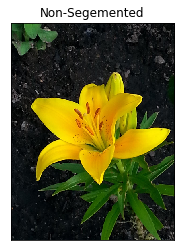

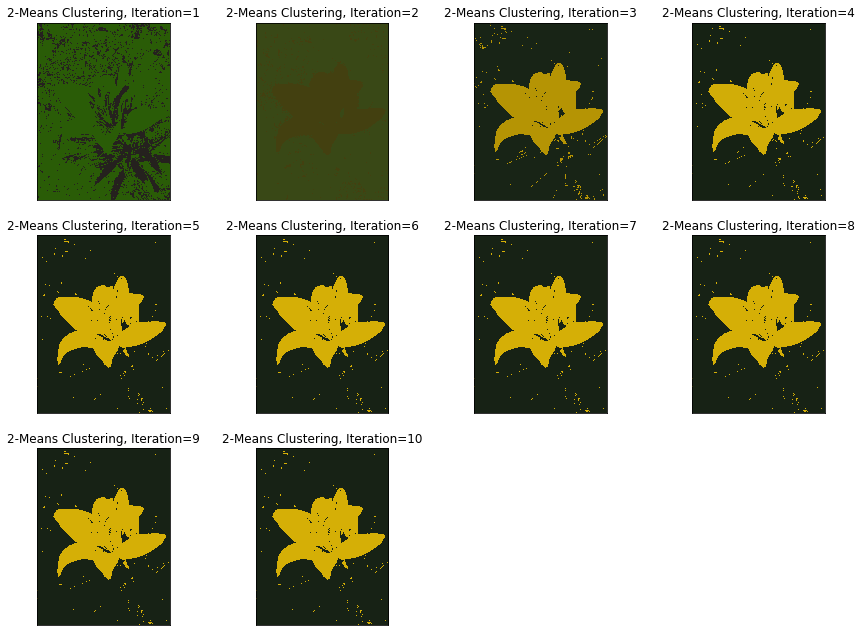

In [69]:
def gen_means(img, k):
    # Randomly assign initial means
    h, w, _ = img.shape
    
    return np.array([ img[np.random.randint(0, h)] # Random Row
                     [np.random.randint(0, w)] # Random Column
                      for i in range(k)]) # For each mean we wish

def k_cluster(img, iterations, k):
    h, w, _ = img.shape
    
    # Randomly assign initial means
    means = gen_means(img, k)
    
    cluster_imgs = list()
    
    for i in range(iterations):
        # Compute difference between all pixels in image and mean for all means
        # distances[means][row][column][channel]
        distances = [img-m for m in means]
        # Normalize to find the distance
        # distances[means][row][column] - channels have been normalized
        distances = np.linalg.norm(np.array(distances), axis=-1)
        
        # Find the mean to which each pixel is closest to
        # clusters[row][column] - clusters contains which cluster each point is assigned to
        clusters = np.argmin(distances, axis=0)
        
        img_copy = img.copy()
        for i in range(len(img)):
            for j in range(len(img[i])):
                img_copy[i][j] = means[clusters[i][j]].copy()
                        
        cluster_imgs.append(img_copy)
        
        # Recalculate means 
        means = np.array([[0,0,0] for i in range(k)])
        for j in range(k):
            for i in range(3):
                means[j][i] = np.mean(img[clusters == j][:,i])
    
    return cluster_imgs
    
img = cv2.cvtColor(cv2.imread('yellowlily.png'), cv2.COLOR_BGR2RGB)
i_list = k_cluster(img, 10, 2)

plt.figure()
plt.imshow(img)
plt.title("Non-Segemented"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
row = 4
col = 4
for i in range(len(i_list)):
    plt.subplot(row, col, i+1)
    plt.imshow(i_list[i])
    plt.title("2-Means Clustering, Iteration={}".format(i+1)), plt.xticks([]), plt.yticks([])
plt.show()    
    